In [3]:
import netket as nk
import netket.experimental as nkx
from netket.experimental.operator.fermion import destroy as c
from netket.experimental.operator.fermion import create as cdag
from netket.experimental.operator.fermion import number as nc
from scipy.sparse.linalg import eigsh
import numpy as np
import scipy.sparse.linalg
import jax
import jax.numpy as jnp
import json
import matplotlib.pyplot as plt

import sys, os
sys.path.append('/Users/wttai/Documents/Jupyter/machine_learning/common_lib')
sys.path.append('/home1/wttai/machine_learning/common_lib')
from models import get_qwz_graph, get_qwz_Ham, cdag_, c_
from networks import *
from helper import get_ed_data

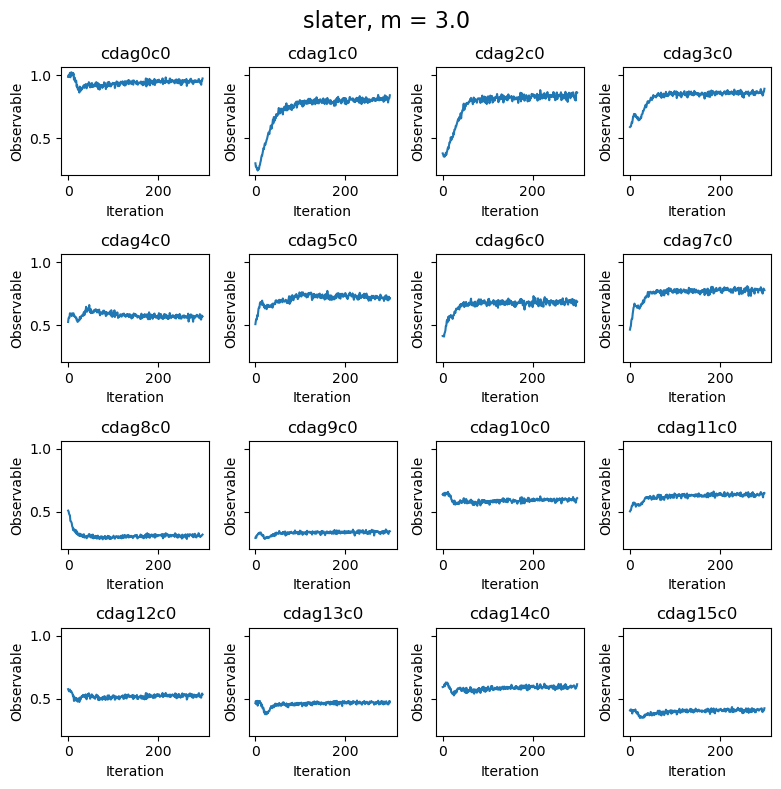

In [4]:
L = 4
N = L ** 2
t = 1.0
m = 3.0
U = 0.0
model = "slater"

data=json.load(open(f"machine_learning/netket_qwz/data/{model}_log_L={L}_t={t}_m={m}_U={U}.log"))


x_values = np.arange(len(data['cdag0c0']['Mean']['real']))

# Create a figure and a set of subplots
fig, axs = plt.subplots(4, 4, figsize=(8, 8), sharey=True)

for i in range(N):
    x = i // L
    y = i % L
    corr = f"cdag{i}c0"
    axs[x][y].plot(x_values, data[corr]['Mean']['real'], label=corr)
    axs[x][y].set_title(corr)
    axs[x][y].set_xlabel('Iteration')
    axs[x][y].set_ylabel('Observable')

fig.suptitle(f'{model}, m = {m}', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()


Text(0, 0.5, 'Energy')

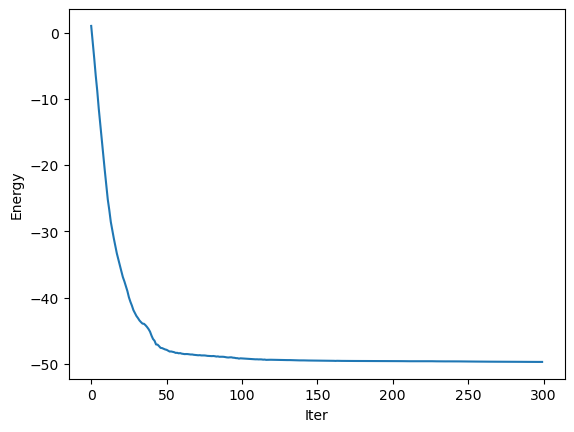

In [5]:
plt.plot(data['Energy']['Mean']['real'])
plt.xlabel("Iter")
plt.ylabel("Energy")

In [7]:
L = 4
N = L ** 2
t = 1.0
m = 3.0
U = 0.0
model = "slater"

data=json.load(open(f"machine_learning/dmrg_qwz/data/dmrg_log_L={L}_t={t}_m={m}_U={U}"))


x_values = np.arange(len(data['cdag0c0']['Mean']['real']))

# Create a figure and a set of subplots
fig, axs = plt.subplots(4, 4, figsize=(8, 8), sharey=True)

for i in range(N):
    x = i // L
    y = i % L
    corr = f"cdag{i}c0"
    axs[x][y].plot(x_values, data[corr]['Mean']['real'], label=corr)
    axs[x][y].set_title(corr)
    axs[x][y].set_xlabel('Iteration')
    axs[x][y].set_ylabel('Observable')

fig.suptitle(f'{model}, m = {m}', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 0: invalid start byte

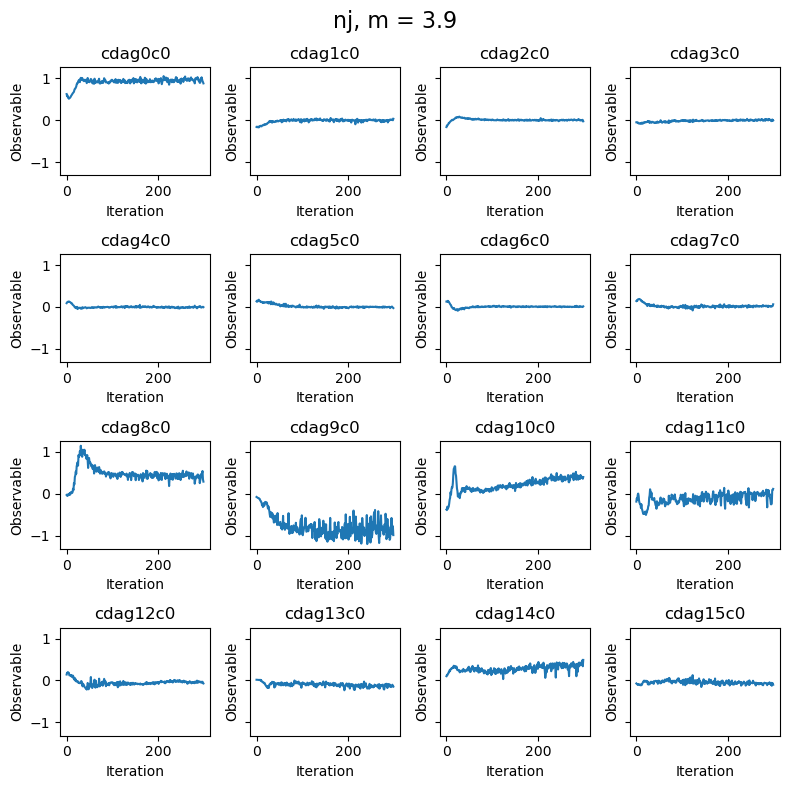

In [31]:
L = 4
N = L ** 2
m = 3.9
model = "nj"

data=json.load(open(f"machine_learning/netket_qwz/data/{model}_log_L={L}_m={m}.log"))


x_values = np.arange(len(data['cdag0c0']['Mean']['real']))

# Create a figure and a set of subplots
fig, axs = plt.subplots(4, 4, figsize=(8, 8), sharey=True)

for i in range(N):
    x = i // L
    y = i % L
    corr = f"cdag{i}c0"
    axs[x][y].plot(x_values, data[corr]['Mean']['real'], label=corr)
    axs[x][y].set_title(corr)
    axs[x][y].set_xlabel('Iteration')
    axs[x][y].set_ylabel('Observable')

fig.suptitle(f'{model}, m = {m}', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()


Text(0, 0.5, 'Energy')

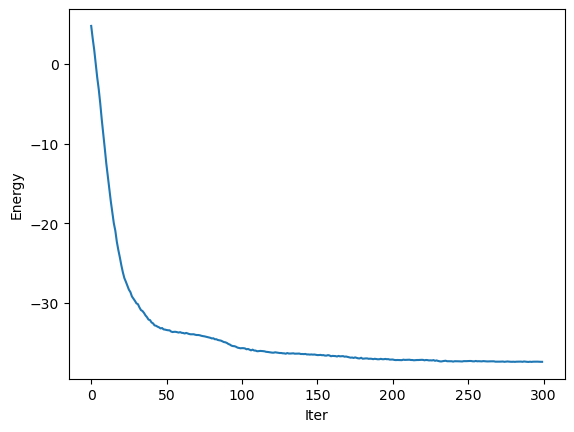